In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN

Lets upload the Data

In [2]:
### info https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
# import some data to play with
cancer = datasets.load_breast_cancer(as_frame=True)
X = cancer.data.copy()
y = cancer.target


In [3]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


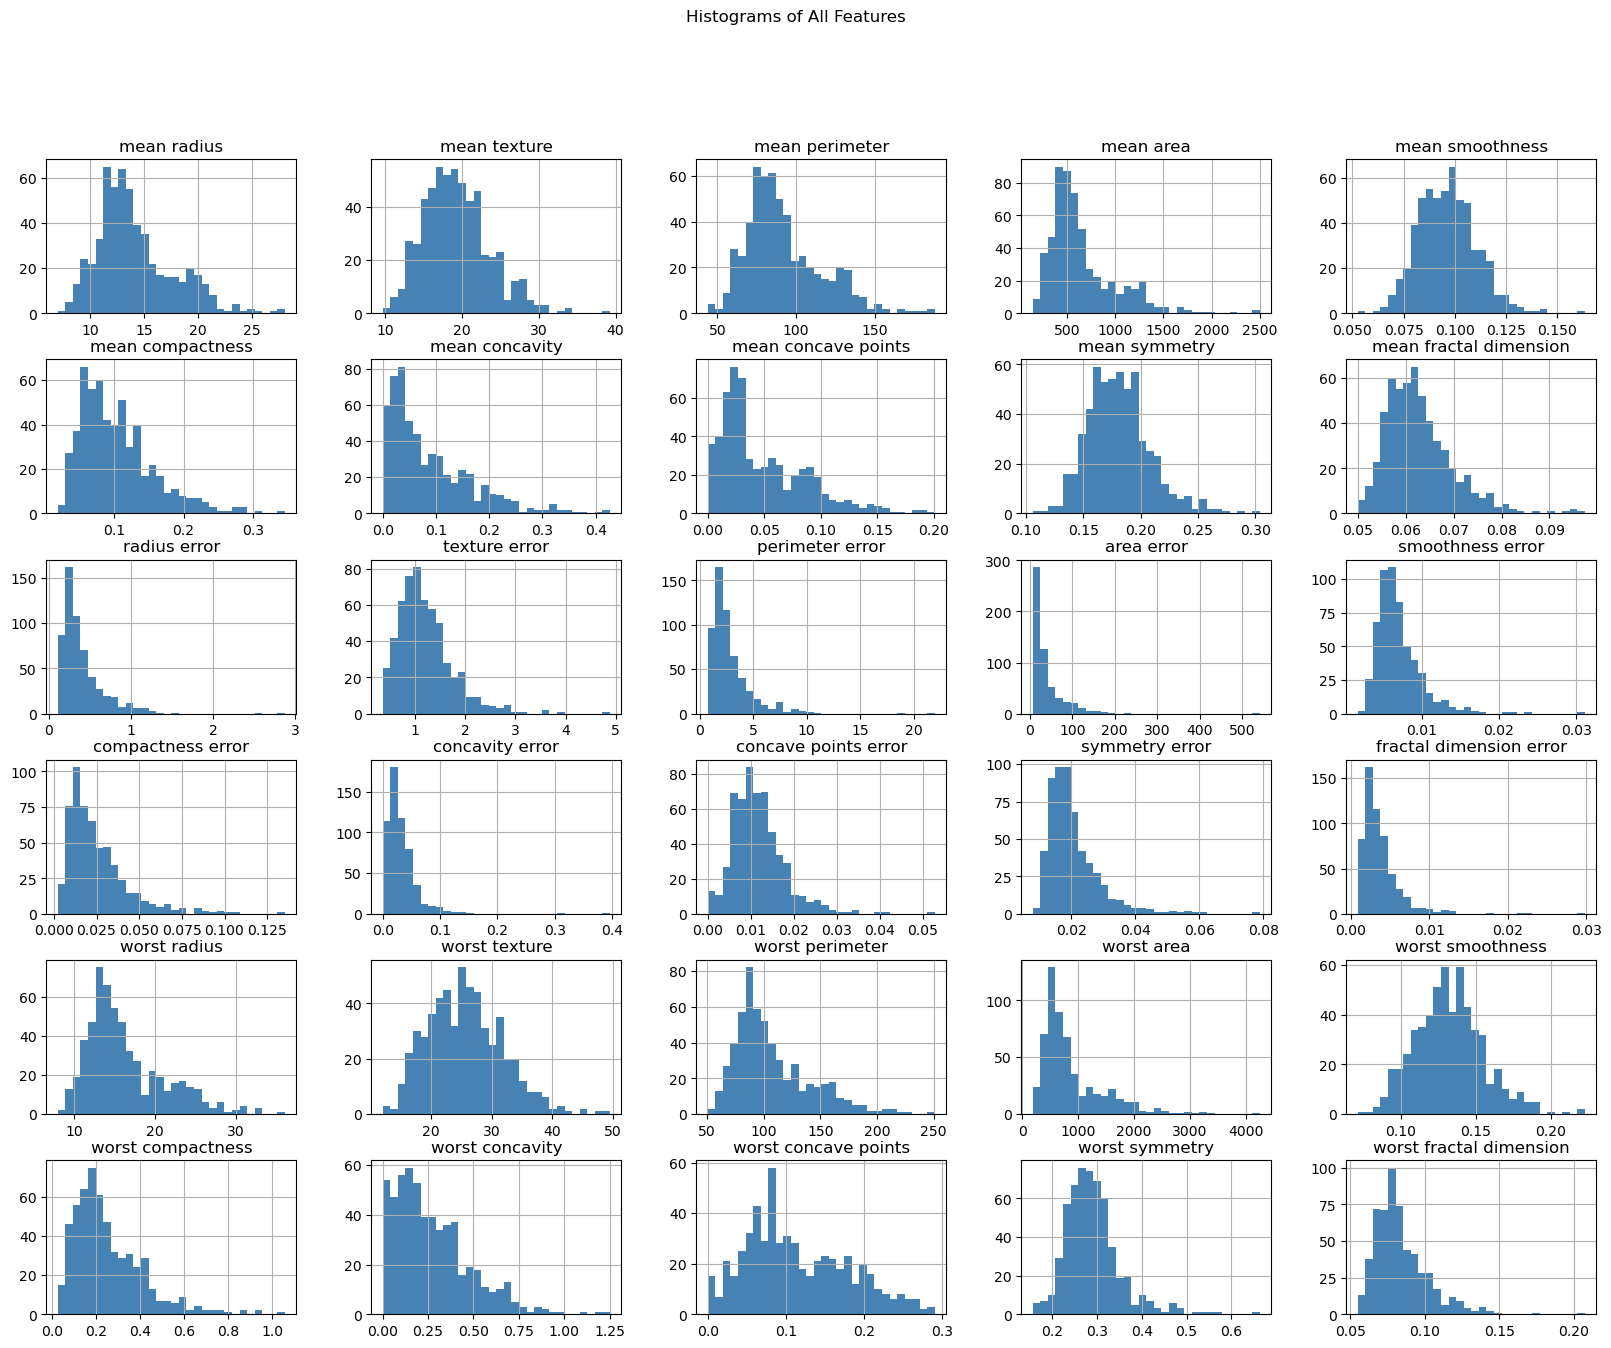

In [4]:
X.hist(bins=30, figsize=(20, 15), color='steelblue')
plt.suptitle('Histograms of All Features')
plt.show()


In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

First we can use PCA to examine the data

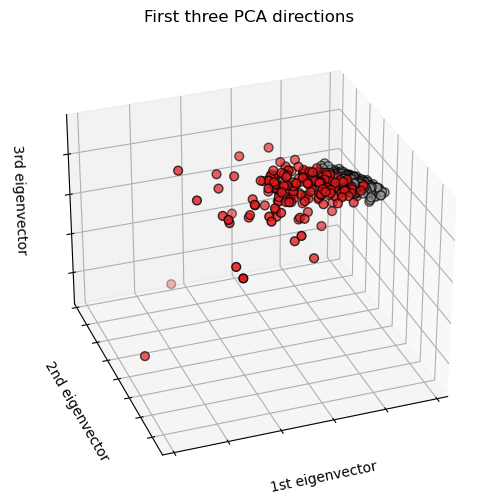

In [6]:
def run_pca(X,y):
    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

    X_reduced = PCA(n_components=3).fit_transform(X)
    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        c=y,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )

    ax.set_title("First three PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.zaxis.set_ticklabels([])

    plt.show()

run_pca(X,y)

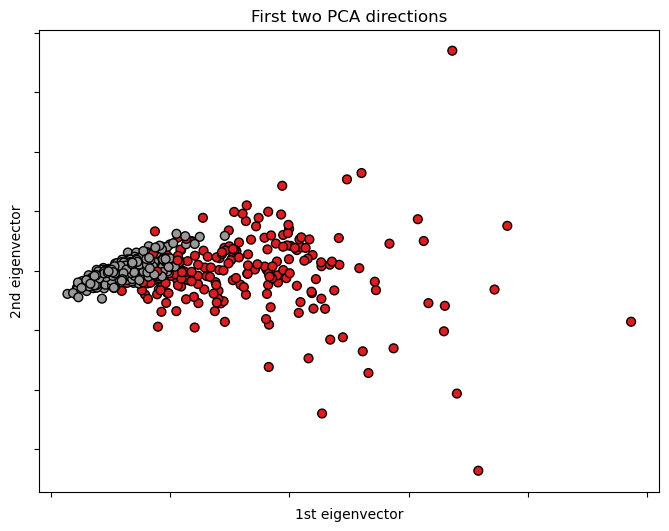

In [7]:
def run_pca(X,y):
    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111)

    X_reduced = PCA(n_components=2).fit_transform(X)
    ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        c=y,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )

    ax.set_title("First two PCA directions")
    ax.set_xlabel("1st eigenvector")
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.yaxis.set_ticklabels([])
#     ax.set_zlabel("3rd eigenvector")
#     ax.zaxis.set_ticklabels([])

    plt.show()

run_pca(X,y)

Now lets train a model an evaluete its preformance

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
clf =  LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9680851063829787

In [11]:
pred_prob = clf.predict_proba(X_test)
pred_prob

array([[1.78055218e-01, 8.21944782e-01],
       [9.99999996e-01, 4.11253696e-09],
       [9.97437064e-01, 2.56293594e-03],
       [7.21967238e-03, 9.92780328e-01],
       [1.73692913e-03, 9.98263071e-01],
       [9.99999999e-01, 5.68715839e-10],
       [1.00000000e+00, 9.58586663e-13],
       [9.90311477e-01, 9.68852298e-03],
       [2.39788506e-03, 9.97602115e-01],
       [1.97509058e-02, 9.80249094e-01],
       [6.53533591e-02, 9.34646641e-01],
       [9.99445880e-01, 5.54120092e-04],
       [1.24806510e-02, 9.87519349e-01],
       [8.19895753e-01, 1.80104247e-01],
       [3.83346878e-03, 9.96166531e-01],
       [9.98807807e-01, 1.19219253e-03],
       [4.42602042e-03, 9.95573980e-01],
       [7.42856174e-04, 9.99257144e-01],
       [3.21026540e-03, 9.96789735e-01],
       [9.99999884e-01, 1.16193416e-07],
       [1.86686464e-01, 8.13313536e-01],
       [2.51469395e-02, 9.74853060e-01],
       [9.99999999e-01, 1.10805312e-09],
       [8.05791668e-03, 9.91942083e-01],
       [1.804251

In [12]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1], pos_label=1)
metrics.auc(fpr, tpr)

0.9975329961761441

To Make it intersting let's add random noise

In [13]:
def add_noise(col):
    std = col.std()
    return col + np.random.normal(loc=0,scale=2*std,size=col.shape)
    

In [14]:
X = cancer.data.copy()
X = X.apply(add_noise,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

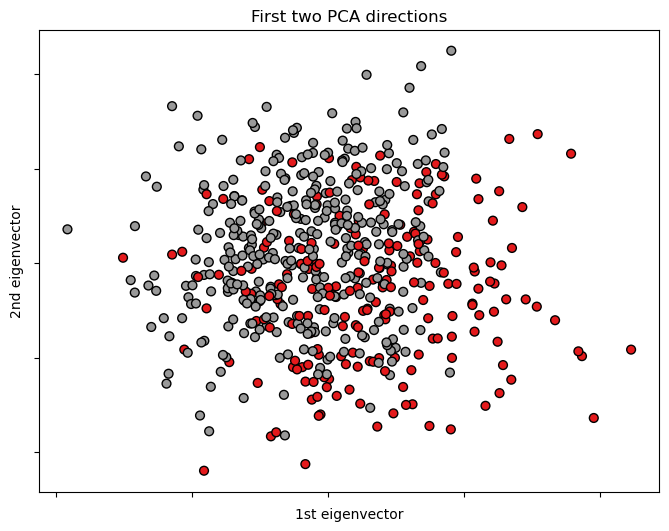

In [15]:
run_pca(X,y)

In [16]:
clf =  LogisticRegression()
clf.fit(X_train, y_train)
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1], pos_label=1)
metrics.auc(fpr, tpr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.691747872209202

In [17]:
clf =  RandomForestClassifier()
clf.fit(X_train, y_train)
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1], pos_label=1)
metrics.auc(fpr, tpr)

0.9015665474281486

Should We Scale?

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

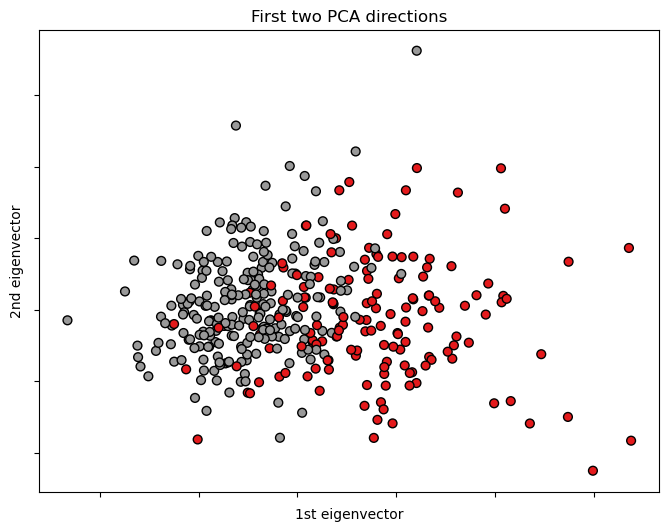

In [19]:

run_pca(X_train,y_train)

In [20]:
clf =  LogisticRegression()
clf.fit(X_train, y_train)
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1], pos_label=1)
metrics.auc(fpr, tpr)

0.9222893795485383

In [21]:
clf =  RandomForestClassifier()
clf.fit(X_train, y_train)
pred_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob[:,1], pos_label=1)
metrics.auc(fpr, tpr)

0.8842358455655607

In [22]:
def train_and_predict(X_train, X_test, y_train, y_test, clf_func=LogisticRegression):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    clf =  clf_func()
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, pred[:,1], pos_label=1)
    return metrics.auc(fpr, tpr), clf

Now lets crate some missing values

In [23]:
import numpy as np
X = cancer.data.copy()
X = X.apply(add_noise,axis=0)
mask = np.random.choice([False, True], size=X.shape, p=[0.5, 0.5])
mask

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ...,  True, False,  True],
       [ True, False, False, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False,  True],
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True,  True,  True]])

In [24]:
X[mask]= np.nan
X


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,NaN,0.026179,126.711575,NaN,NaN,0.422240,0.357948,0.037305,NaN,0.070908,...,NaN,NaN,247.806160,2582.932340,0.145571,1.142386,0.471531,-0.068885,0.613223,0.161157
1,NaN,18.912419,137.865866,NaN,0.061707,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,160.625071,NaN,NaN,NaN,-0.017429,NaN,0.059364,NaN
2,NaN,30.310060,98.458338,690.537483,0.153976,NaN,NaN,NaN,NaN,0.046176,...,NaN,NaN,NaN,1837.027712,NaN,NaN,0.563984,0.287702,NaN,NaN
3,NaN,14.977257,NaN,487.390803,NaN,NaN,0.129921,NaN,NaN,0.122510,...,4.607013,NaN,NaN,727.064075,0.165062,NaN,NaN,0.101082,0.498973,0.127403
4,14.464248,14.958579,NaN,327.807892,0.095010,0.156944,NaN,NaN,NaN,0.060022,...,22.769108,25.362069,NaN,1353.592208,0.152818,NaN,0.320126,0.380983,0.144583,0.045349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,23.596659,NaN,NaN,1821.807091,0.081368,0.181706,0.264065,0.138287,NaN,NaN,...,26.251426,NaN,207.800037,NaN,0.161327,NaN,0.227630,NaN,NaN,0.069975
565,NaN,24.064042,NaN,NaN,NaN,0.166739,NaN,NaN,NaN,NaN,...,NaN,35.798539,120.274892,NaN,NaN,NaN,1.724348,0.306861,0.267934,NaN
566,NaN,NaN,NaN,NaN,0.152938,0.256857,NaN,NaN,0.106738,NaN,...,NaN,NaN,130.272198,1016.885829,0.186782,-0.147880,NaN,0.130115,0.140579,NaN
567,NaN,NaN,144.718434,NaN,0.140986,NaN,NaN,0.052639,0.224571,0.084449,...,NaN,26.789254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101366


Now fill the NaN with zeros

In [25]:
X.fillna(0,inplace=True)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.000000,0.026179,126.711575,0.000000,0.000000,0.422240,0.357948,0.037305,0.000000,0.070908,...,0.000000,0.000000,247.806160,2582.932340,0.145571,1.142386,0.471531,-0.068885,0.613223,0.161157
1,0.000000,18.912419,137.865866,0.000000,0.061707,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,160.625071,0.000000,0.000000,0.000000,-0.017429,0.000000,0.059364,0.000000
2,0.000000,30.310060,98.458338,690.537483,0.153976,0.000000,0.000000,0.000000,0.000000,0.046176,...,0.000000,0.000000,0.000000,1837.027712,0.000000,0.000000,0.563984,0.287702,0.000000,0.000000
3,0.000000,14.977257,0.000000,487.390803,0.000000,0.000000,0.129921,0.000000,0.000000,0.122510,...,4.607013,0.000000,0.000000,727.064075,0.165062,0.000000,0.000000,0.101082,0.498973,0.127403
4,14.464248,14.958579,0.000000,327.807892,0.095010,0.156944,0.000000,0.000000,0.000000,0.060022,...,22.769108,25.362069,0.000000,1353.592208,0.152818,0.000000,0.320126,0.380983,0.144583,0.045349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,23.596659,0.000000,0.000000,1821.807091,0.081368,0.181706,0.264065,0.138287,0.000000,0.000000,...,26.251426,0.000000,207.800037,0.000000,0.161327,0.000000,0.227630,0.000000,0.000000,0.069975
565,0.000000,24.064042,0.000000,0.000000,0.000000,0.166739,0.000000,0.000000,0.000000,0.000000,...,0.000000,35.798539,120.274892,0.000000,0.000000,0.000000,1.724348,0.306861,0.267934,0.000000
566,0.000000,0.000000,0.000000,0.000000,0.152938,0.256857,0.000000,0.000000,0.106738,0.000000,...,0.000000,0.000000,130.272198,1016.885829,0.186782,-0.147880,0.000000,0.130115,0.140579,0.000000
567,0.000000,0.000000,144.718434,0.000000,0.140986,0.000000,0.000000,0.052639,0.224571,0.084449,...,0.000000,26.789254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101366


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
train_and_predict(X_train, X_test, y_train, y_test)

(0.7854940175157271, LogisticRegression())

What else can we do? lets try to replace the NA with the mean of every feature

In [28]:
X[mask]= np.nan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)


In [30]:
train_and_predict(X_train, X_test, y_train, y_test)

(0.8701122486739854, LogisticRegression())

KNNImputer: impute each obj missing values by the mean of it's k-Nearest Neighbors

In [31]:
from sklearn.impute import KNNImputer
X[mask]= np.nan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
imputer = KNNImputer(n_neighbors=10)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
train_and_predict(X_train, X_test, y_train, y_test)

(0.8465523621561614, LogisticRegression())

**Feature Importance**

In [32]:
X = cancer.data.copy()
#X = X.apply(add_noise,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
auc, clf = train_and_predict(X_train, X_test, y_train, y_test)
auc

0.9972862957937585

In [33]:
clf.coef_   

array([[-0.36048257, -0.37928706, -0.34239942, -0.40981403, -0.0701941 ,
         0.6382286 , -0.79808635, -1.0985293 ,  0.15315188,  0.11908427,
        -1.17747141,  0.22238149, -0.70866434, -0.81444289, -0.20651383,
         0.53205463,  0.04447138, -0.43698303,  0.49799868,  0.59437411,
        -0.76099683, -1.28013819, -0.56382538, -0.71579019, -0.5415975 ,
         0.09222063, -0.97554811, -0.74688349, -1.16159623, -0.11296927]])

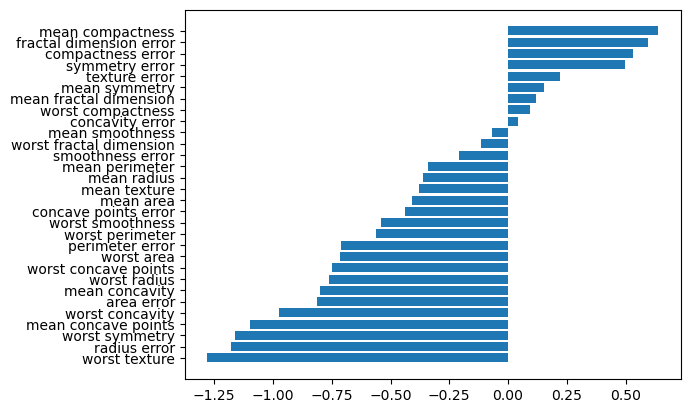

In [34]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(clf.coef_[0], X.columns)

Lets obsrved some of the features 

In [35]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

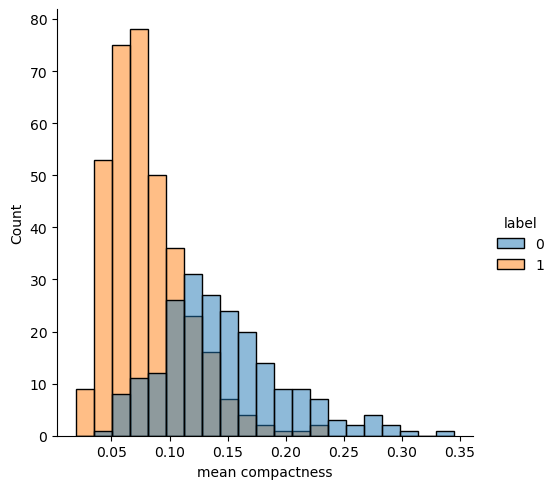

In [36]:
import seaborn as sns
df = X.copy()
df["label"] = y
sns.displot(x="mean compactness", hue="label" ,data=df)

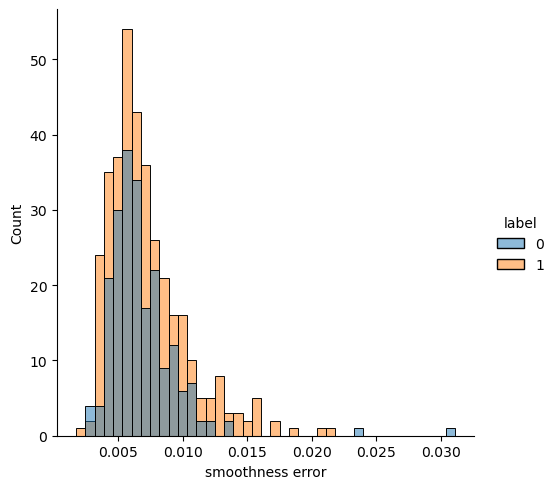

In [37]:
sns.displot(x="smoothness error", hue="label" ,data=df)

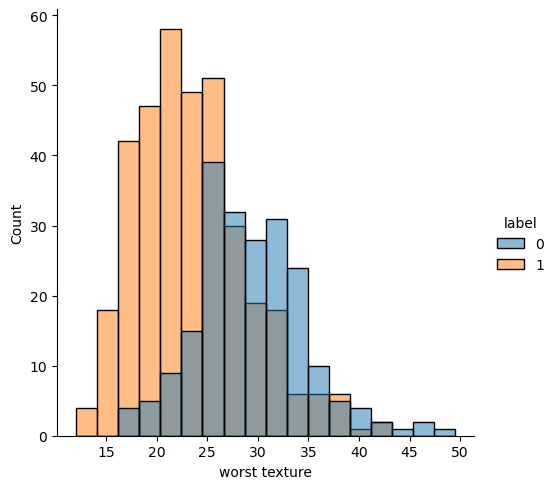

In [38]:
sns.displot(x="worst texture", hue="label" ,data=df)

**Feature Selection**

In [39]:
X = cancer.data.copy()
X = X.apply(add_noise,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
indexs = np.random.choice(X.columns.shape[0], 3, replace=False) 
X_train_sub = X_train.iloc[:,indexs]
X_test_sub = X_test.iloc[:,indexs]
auc, clf = train_and_predict(X_train_sub, X_test_sub, y_train, y_test)
auc

0.6652275811027507

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [41]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=3, step=3)
selector = selector.fit(X_train, y_train)
print(selector.support_)


[False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [42]:
X.loc[:,selector.support_]

,mean concavity,mean concave points,worst concave points
0,0.429687,0.265263,0.292003
1,-0.089290,0.115980,0.263888
2,0.396846,0.144795,0.456989
3,0.190980,0.215468,0.346081
4,0.185371,0.148686,0.145405
...,...,...,...
564,0.351936,0.110304,0.434970
565,0.117350,-0.006640,0.175220
566,0.270650,0.123899,0.330782
567,0.379588,0.188888,0.293794


In [43]:
auc, clf = train_and_predict(X_train.loc[:,selector.support_], X_test.loc[:,selector.support_], y_train, y_test)
auc


0.7623041815714816

**PipeLine**

In [44]:
X = cancer.data.copy()
X = X.apply(add_noise,axis=0)
X[mask]= np.nan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("imputer", KNNImputer(n_neighbors=12)),('scaler', StandardScaler()), ('LR', LogisticRegression())])
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

**Unblance Data**

In [46]:
X = cancer.data.copy()
X = X.apply(add_noise,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

Lets crate Unblance Data


In [48]:
y_pos  = y[y==1]
y_pos_sample = y_pos.sample(frac=0.01)

indexs = list(filter(lambda x: not x in y_pos.index or x in y_pos_sample.index, y.index))
y_sub = y[indexs]
X_sub = X.loc[indexs]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.33, random_state=100)
y_sub.value_counts()



0    212
1      4
Name: target, dtype: int64

In [49]:
y_train.value_counts()

0    141
1      3
Name: target, dtype: int64

In [50]:
auc, clf = train_and_predict(X_train, X_test, y_train, y_test,KNeighborsClassifier)
auc

0.9718309859154929

In [51]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9861111111111112

In [52]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

**KMeans**

In [53]:
from sklearn.cluster import KMeans
X = cancer.data.copy()
X = X.apply(add_noise,axis=0)

In [54]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X.values)

In [55]:
(1-kmeans.labels_ == y).sum()

192

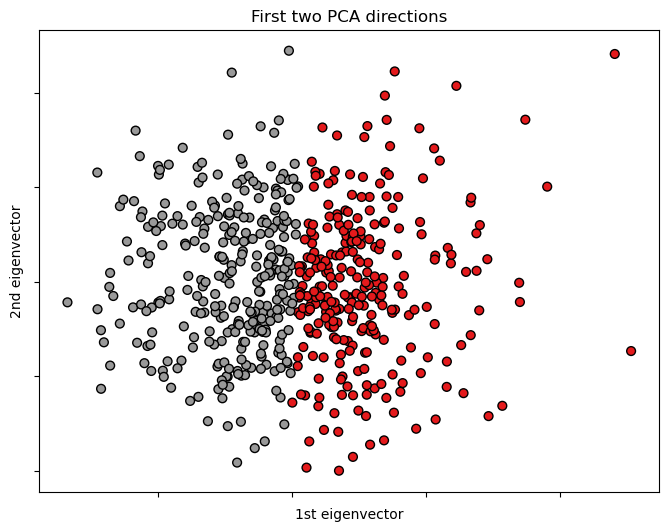

In [56]:
run_pca(X,kmeans.labels_)

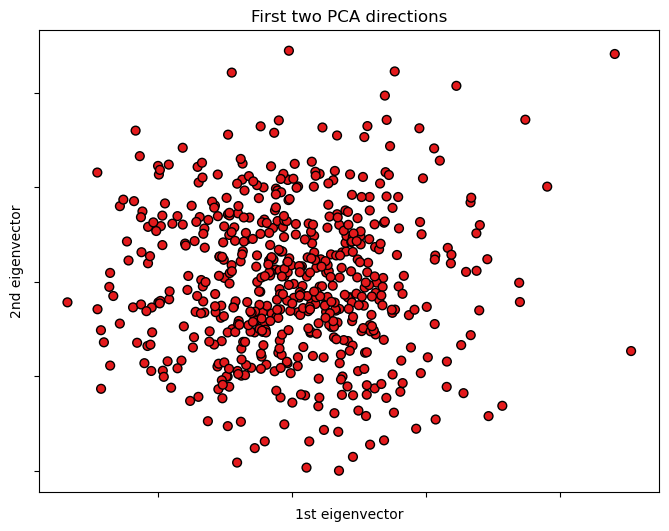

In [58]:
dbscan = DBSCAN().fit(X.values)
run_pca(X,dbscan.labels_)